In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import plotly.express as px
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("./50_Startups.csv",usecols=["R&D Spend","Marketing Spend","Profit"])
df.head()

,R&D Spend,Marketing Spend,Profit
0,165349.20,471784.10,192261.83
1,162597.70,443898.53,191792.06
2,153441.51,407934.54,191050.39
3,144372.41,383199.62,182901.99
4,142107.34,366168.42,166187.94


c:\Users\Ripple\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


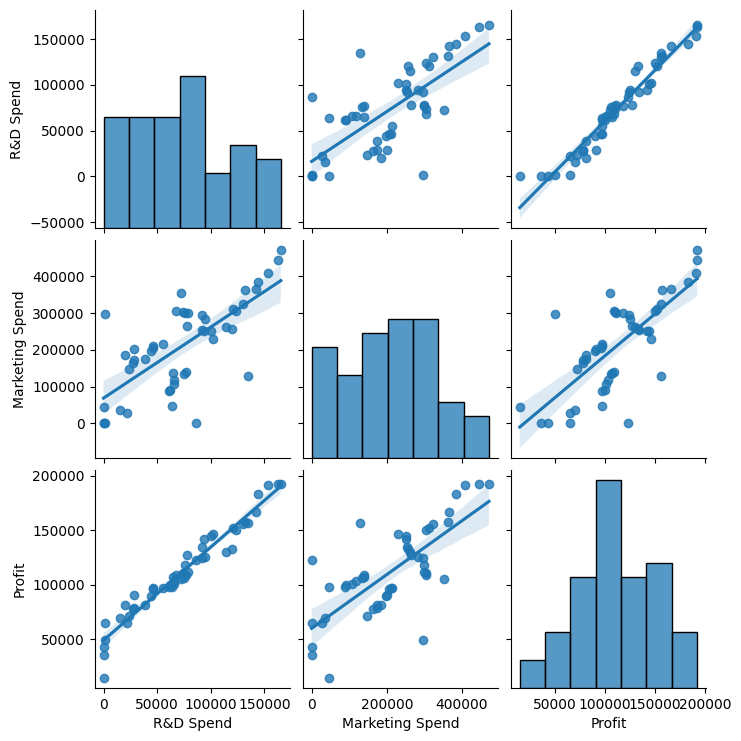

In [4]:
sns.pairplot(df,kind="reg")

In [33]:
%matplotlib qt
fig = px.scatter_3d(df, x='R&D Spend', y='Marketing Spend', z='Profit')

fig.show()

In [ ]:
x = df.drop(columns=["Profit"],axis=1)
y = df["Profit"]


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=10)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x_train,y_train)

LinearRegression()

In [34]:
lr.coef_

array([0.79172038, 0.0271221 ])

In [35]:
lr.intercept_

47728.73927243413

In [12]:
y_pred=lr.predict(x_test)

In [13]:
from sklearn.metrics import r2_score

In [14]:
r2_score(y_test,y_pred)

0.9882802960086746

In [32]:
scatter = go.Scatter3d(
    x=x_test["R&D Spend"],
    y=x_test["Marketing Spend"],
    z=y_test,
    mode="markers",
    marker=dict(
        size=5,
        color=y_test,  
    ),
    name="Actual"
)

# Add the regression plane
x_plane = x_test["R&D Spend"]
y_plane = x_test["Marketing Spend"]
xx_plane, yy_plane = np.meshgrid(x_plane, y_plane)
z_plane = lr.predict(pd.DataFrame({'R&D Spend': xx_plane.ravel(), 'Marketing Spend': yy_plane.ravel()}))

plane_surface = go.Surface(
    x=xx_plane,
    y=yy_plane,
    z=z_plane.reshape(xx_plane.shape),
    opacity=0.5
)

fig = go.Figure(data=[scatter, plane_surface])

# Set layout properties
fig.update_layout(
    scene=dict(
        xaxis_title="R&D Spend",
        yaxis_title="Marketing Spend",
        zaxis_title="Profit",
    ),
    margin=dict(l=0, r=0, t=0, b=0),
)

fig.show()